In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

Text(0.5, 1.0, 'Data')

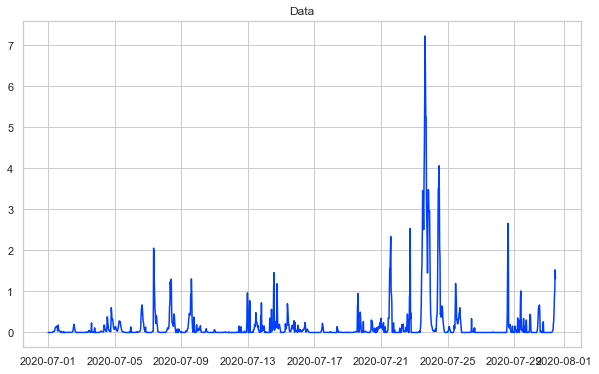

In [63]:
df = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df.columns = ['Date','ddate','value','geo']
df['Date'] = df['Date'].astype(str).str[:-2].astype(str)
df['Date'].iloc[43]
df.columns
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d%H%M')
del df['ddate'],df['geo']
#plt.show()
sd = df.loc[(df['Date'].between('2020-07-01 00:00:00', '2020-07-31 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s = sd['value']
t = sd['Date']
plt.figure(figsize=(10,6))
plt.plot(t, s)
plt.title("Data")

Text(0.5, 1.0, 'Data')

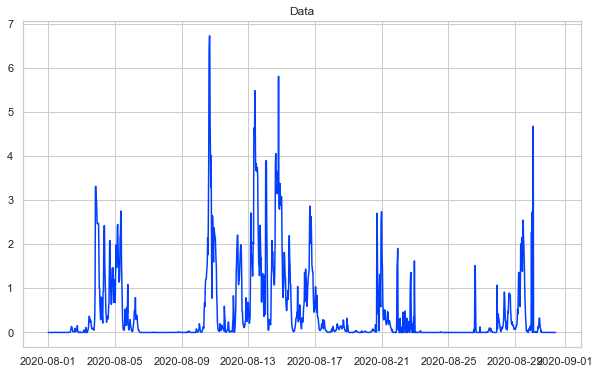

In [64]:
df1 = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df1.columns = ['Date','ddate','value','geo']
df1['Date'] = df1['Date'].astype(str).str[:-2].astype(str)
df1['Date'].iloc[43]
df1.columns
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y%m%d%H%M')
del df1['ddate'],df1['geo']
#plt.show()
sd1 = df1.loc[(df1['Date'].between('2020-08-01 00:00:00', '2020-08-31 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s2 = sd1['value']
t2 = sd1['Date']
plt.figure(figsize=(10,6))
plt.plot(t2, s2)
plt.title("Data")

In [65]:
print(np.shape(s))
print(np.shape(s2))

(1464,)
(1445,)


In [66]:
from scipy.stats import wasserstein_distance

In [67]:
wasserstein_distance(s,s2)

0.2974184117613045

In [68]:
tf1 = np.arange(s.shape[0])
signal_1 = pd.DataFrame(zip(tf1,s),columns=['Time','Value'])
tf2 = np.arange(s2.shape[0])
signal_2 = pd.DataFrame(zip(tf2,s2),columns=['Time','Value'])

In [69]:
signal_1.equals(signal_2)

False

In [70]:
def jaccard(dff, dfj):
    a = 0
    intersect =[]
    union = []
    n1 = np.array(dff.Value)
    n2 = np.array(dfj.Value)
    n1 = np.append(n1,n2.max())
    n1 = np.append(n1,n2.min())
    n2 = np.append(n2,n1.max())
    n2 = np.append(n2,n1.min())
    count1, bin_edges1 = np.histogram(n2, bins=20)
    count2, bin_edges2 = np.histogram(n1, bins=20)

    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()

    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()

    jacc1 = isum/usum
            #x = wasserstein_distance(dff.value,dfj.value)
    a = jacc1
    return a

In [71]:
jaccard(signal_1,signal_2)

0.6985422740524782

# FFT - Real and Imag

In [72]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

<StemContainer object of 3 artists>

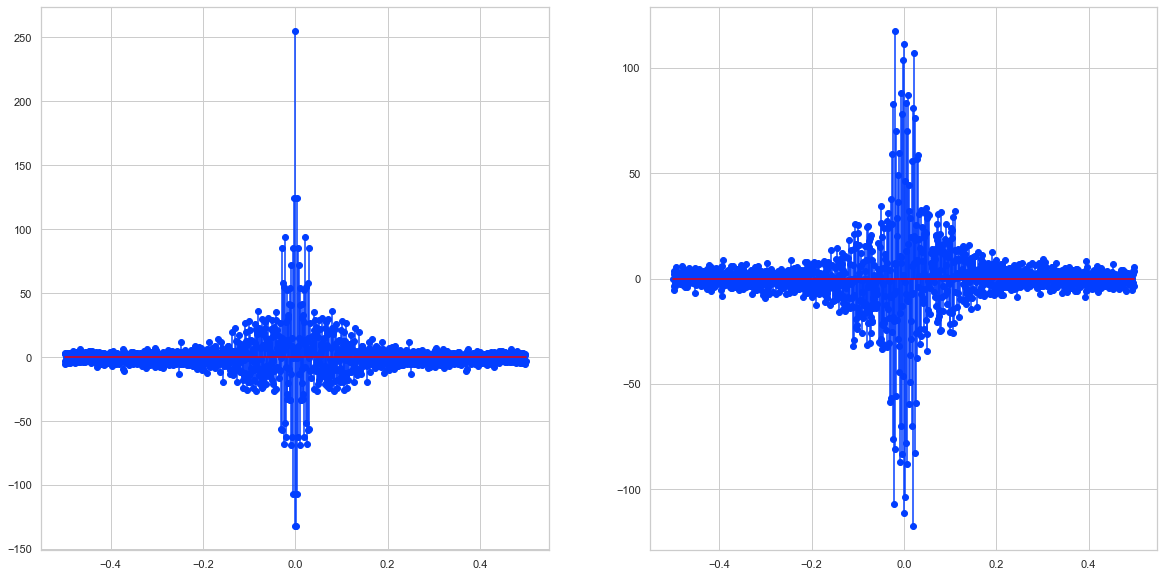

In [73]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

<StemContainer object of 3 artists>

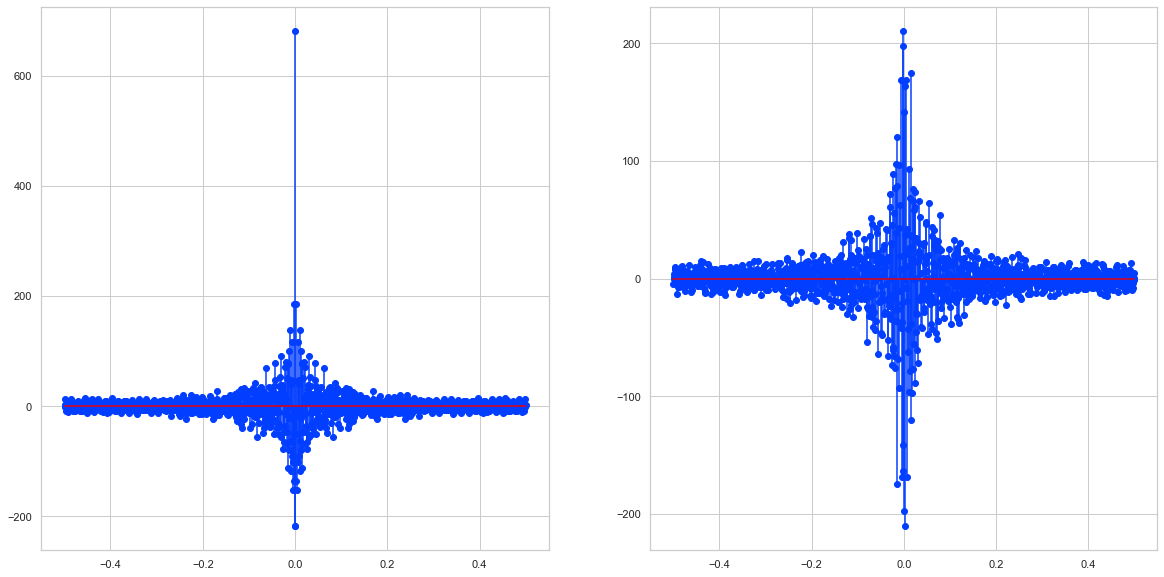

In [74]:
freq_ampli2,freq_ampli2i = freq(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

In [75]:
print("Real: ",wasserstein_distance(freq_ampli1['Ampli'], freq_ampli2['Ampli']))
print("Imaginary", wasserstein_distance(freq_ampli1i['Ampli'], freq_ampli2i['Ampli']))

Real:  4.771183735633267
Imaginary 4.761817171080998


In [76]:
freq_ampli1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1,freq_ampli2))
freq_ampli1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.7773032336790726


In [77]:
freq_ampli1i.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2i.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1i,freq_ampli2i))
freq_ampli1i.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2i.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.9164473684210527


# FFT - Magnitude and phase

In [78]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [79]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Phase'])
    return fft_data1

<StemContainer object of 3 artists>

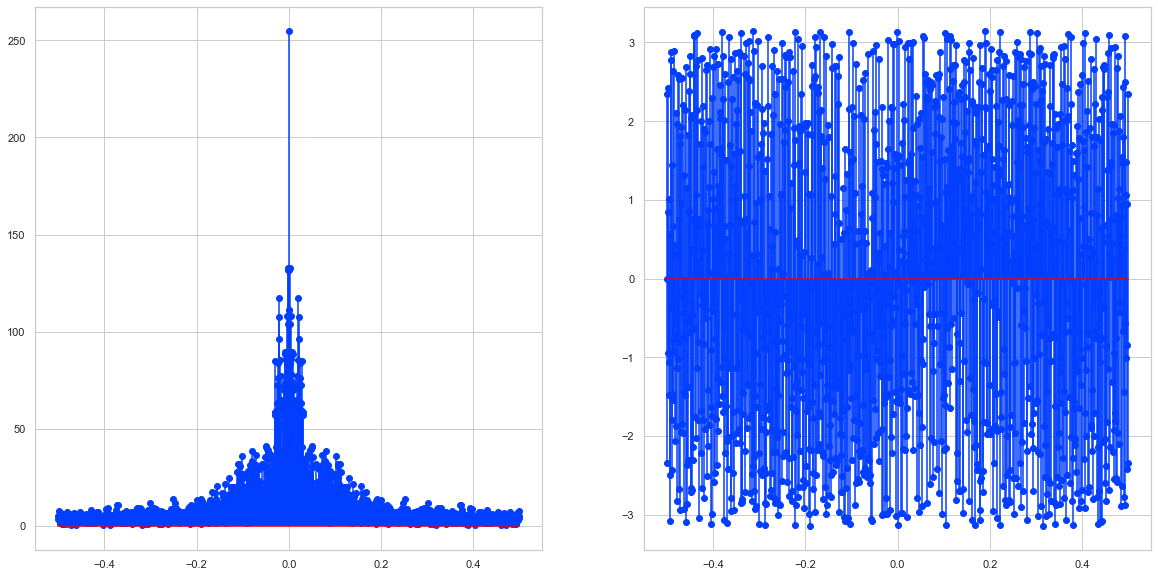

In [80]:
freq_ampli_mag1 = freq_mag(signal_1)
freq_ampli_phase1 = freq_phase(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])

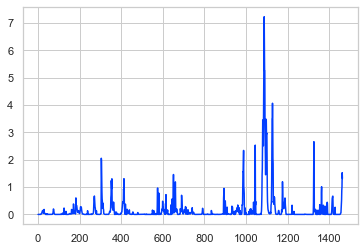

In [81]:
import math
import numpy.fft as FFT
def inverse_mag_phase(df1, df2):
    mag = df1['Ampli'].to_numpy()
    phase = df2['Phase'].to_numpy()
    for_ifft = [[] for i in range(len(mag))]
    for i in range(len(mag)):
            rl = mag[i]*math.cos(phase[i])
            im = mag[i]*math.sin(phase[i])
            for_ifft[i].append(complex(rl,im))
    ifftc = FFT.ifft2(for_ifft)
    return ifftc
ifft_mag_phase1 = inverse_mag_phase(freq_ampli_mag1, freq_ampli_phase1)
plt.plot(ifft_mag_phase1)

In [82]:
from scipy.spatial import distance
distance.euclidean(s,ifft_mag_phase1)

8.09741452187788e-15

<StemContainer object of 3 artists>

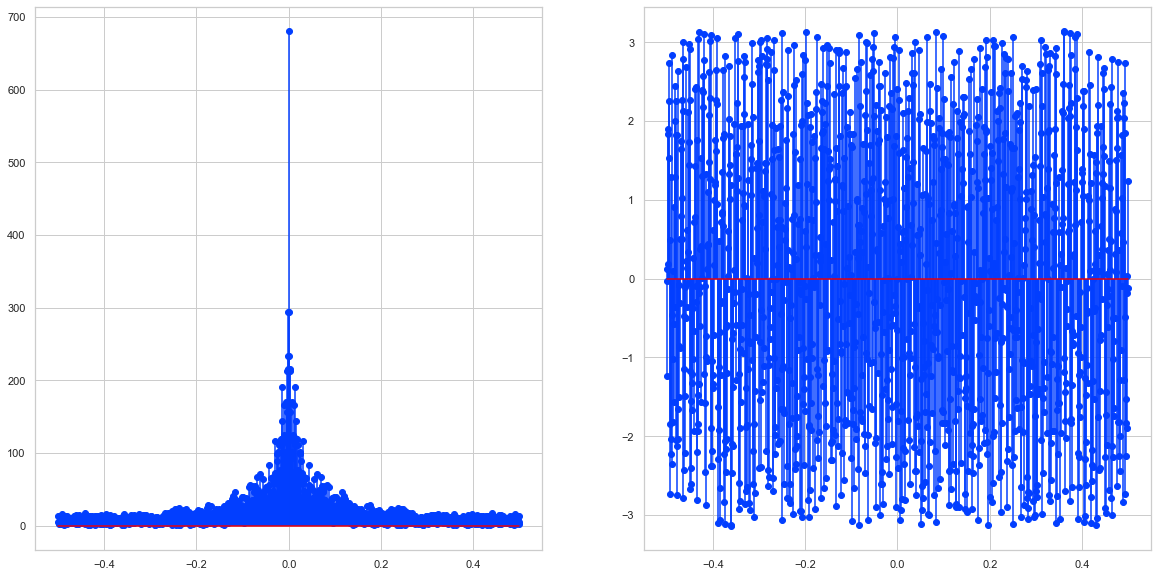

In [83]:
freq_ampli_mag2 = freq_mag(signal_2)
freq_ampli_phase2 = freq_phase(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

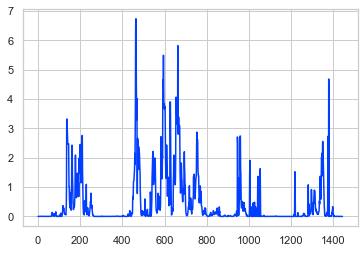

In [84]:
ifft_mag_phase2 = inverse_mag_phase(freq_ampli_mag2, freq_ampli_phase2)
plt.plot(ifft_mag_phase2)

In [85]:
distance.euclidean(s2,ifft_mag_phase2)

1.4565326518881216e-14

In [86]:
print("Magnitude: ",(wasserstein_distance(freq_ampli_mag1['Ampli'], freq_ampli_mag2['Ampli'])))
print("Phase", wasserstein_distance(freq_ampli_phase1['Phase'], freq_ampli_phase2['Phase']))

Magnitude:  7.048384732277013
Phase 0.12766871593491178


In [87]:
freq_ampli_mag1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli_mag1,freq_ampli_mag2))
freq_ampli_mag1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.8927875243664717


In [88]:
freq_ampli_phase1.rename(columns = {'Phase':'Value'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Phase':'Value'}, inplace = True)
print(jaccard(freq_ampli_phase1,freq_ampli_phase2))
freq_ampli_phase1.rename(columns = {'Value': 'Phase'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Value': 'Phase'}, inplace = True)

0.8709055876685935


# Cepstrum

In [89]:
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum

In [90]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps1, _ = complex_cepstrum(signal_1['Value'])
print(ceps1)

[  1.85366973 -13.75789601 -27.26838433 ...   2.98246573  27.77129429
  14.86999933]


In [91]:
duration = signal_2.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps2, _ = complex_cepstrum(signal_2['Value'])
print(ceps2)

[  2.41506856  46.35835855  11.55660935 ...  -5.48151822 -11.11253975
 -45.48410979]


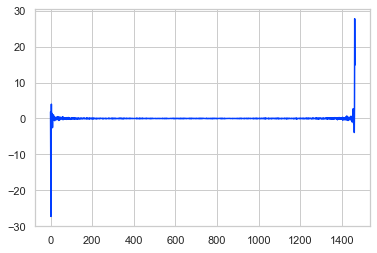

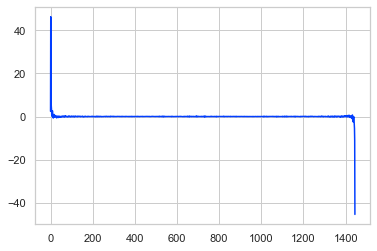

In [92]:
plt.plot(ceps1)
plt.show()
plt.plot(ceps2)

In [93]:
print(wasserstein_distance(ceps1,ceps2))

0.047555829530262834


In [94]:
cepstrum1 = pd.DataFrame(ceps1,columns=['Value'])
cepstrum2 = pd.DataFrame(ceps2,columns=['Value'])

In [95]:
print(jaccard(cepstrum1,cepstrum2))

0.9775967413441955


## Results

In [96]:
from prettytable import PrettyTable

+-------------+---------------+---------------+--------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD         |      Jaccard       |
+-------------+---------------+---------------+--------------------+--------------------+
| Time Series | Multi Sines 1 | Multi Sines 2 | 0.2974184117613045 | 0.6985422740524782 |
+-------------+---------------+---------------+--------------------+--------------------+


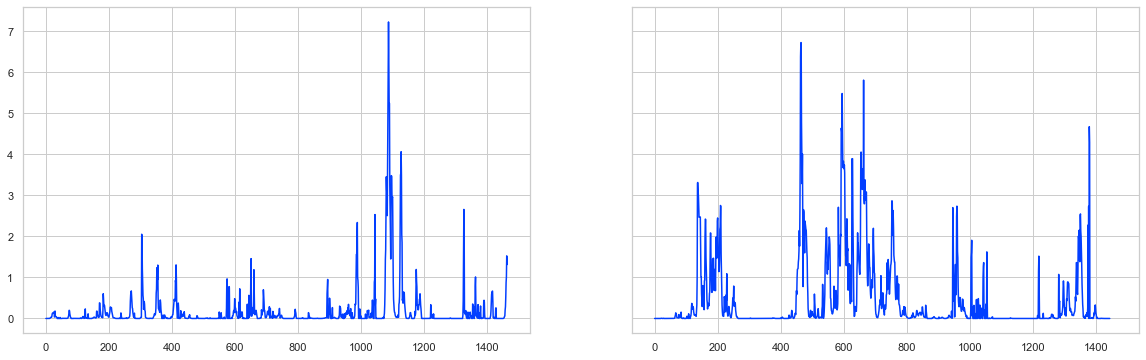

In [97]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex=True, sharey=True)
axs[0].plot(signal_1["Time"],signal_1['Value'])
axs[1].plot(signal_2["Time"],signal_2['Value'])
table = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table.add_row(['Time Series','Multi Sines 1','Multi Sines 2',wasserstein_distance(s,s2),jaccard(signal_1,signal_2)])
print(table)

+-------------+---------------+---------------+-------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD        |      Jaccard       |
+-------------+---------------+---------------+-------------------+--------------------+
|    Freq_R   | Multi Sines 1 | Multi Sines 2 | 4.771183735633267 | 0.7773032336790726 |
|    Freq_I   | Multi Sines 1 | Multi Sines 2 | 4.761817171080998 | 0.9164473684210527 |
+-------------+---------------+---------------+-------------------+--------------------+


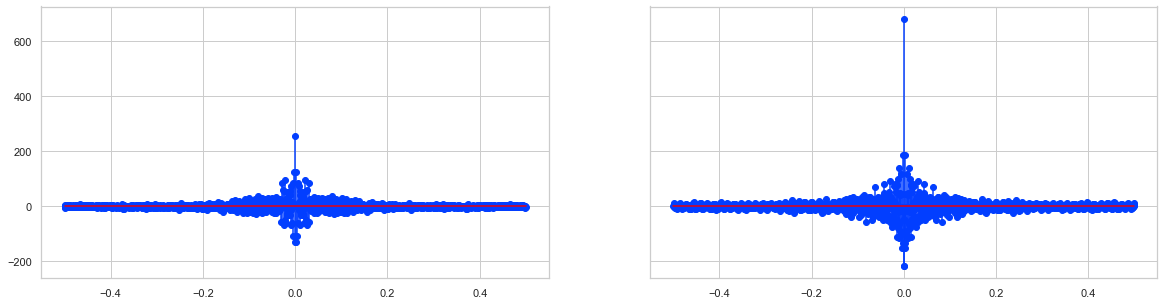

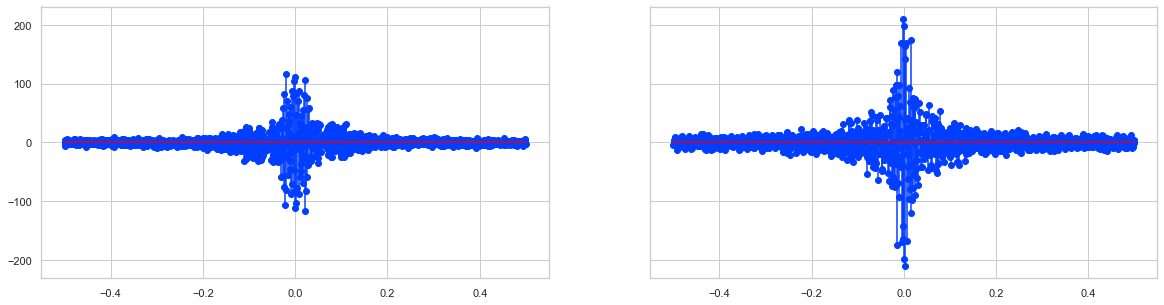

In [102]:
fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

table2 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table2.add_row(['Freq_R','Multi Sines 1','Multi Sines 2',4.771183735633267,0.7773032336790726])
table2.add_row(['Freq_I','Multi Sines 1','Multi Sines 2',4.761817171080998, 0.9164473684210527])
print(table2)

+-------------+---------------+---------------+---------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD         |      Jaccard       |
+-------------+---------------+---------------+---------------------+--------------------+
|   Freq_Mag  | Multi Sines 1 | Multi Sines 2 |  7.048384732277013  | 0.8927875243664717 |
|  Freq_Phase | Multi Sines 1 | Multi Sines 2 | 0.12766871593491178 | 0.8709055876685935 |
+-------------+---------------+---------------+---------------------+--------------------+


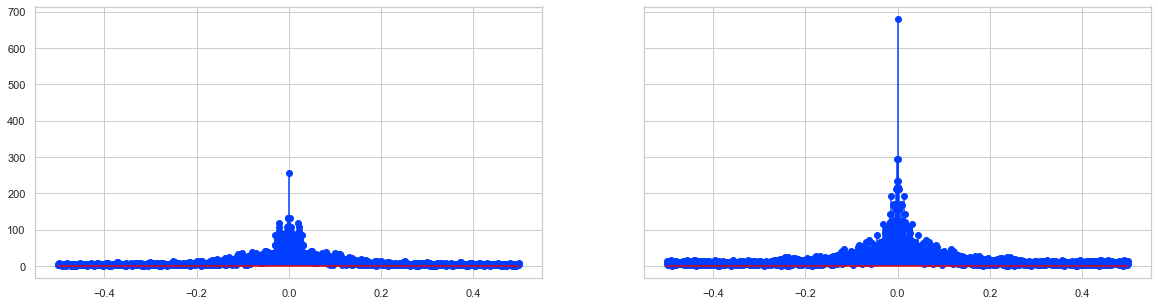

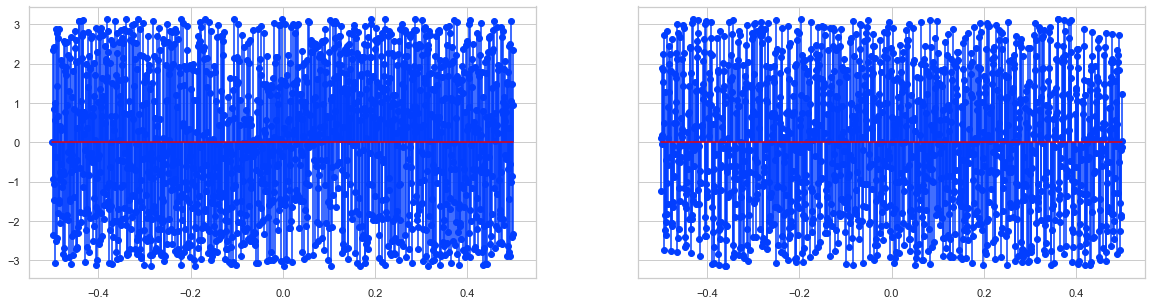

In [103]:
fig, axs = plt.subplots(1,2,figsize=(20,5), sharex=True, sharey=True)
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

table3 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table3.add_row(['Freq_Mag','Multi Sines 1','Multi Sines 2',7.048384732277013,0.8927875243664717])
table3.add_row(['Freq_Phase','Multi Sines 1','Multi Sines 2',0.12766871593491178,0.8709055876685935])
print(table3)

+-------------+---------------+---------------+----------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD          |      Jaccard       |
+-------------+---------------+---------------+----------------------+--------------------+
|   Cepstrum  | Multi Sines 1 | Multi Sines 2 | 0.047555829530262834 | 0.9775967413441955 |
+-------------+---------------+---------------+----------------------+--------------------+


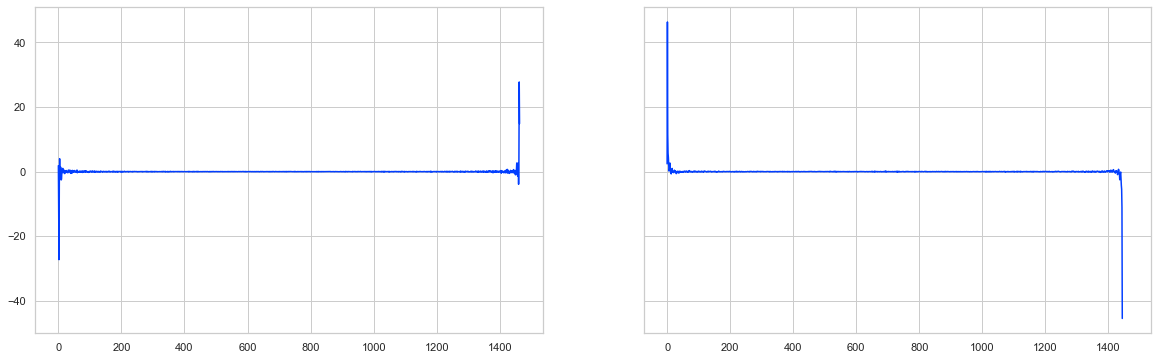

In [104]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)
axs[0].plot(ceps1)
axs[1].plot(ceps2)
table4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])
print(table4)